In [2]:
import os
import cPickle as pickle
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split

import sys
sys.path.append('../')

%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import tt
from src.TTRegression import TTRegression
import urllib

In [3]:
train_fraction = 0.8

In [4]:
def get_dummies(d, col):
    dd = pd.get_dummies(d.ix[:, col])
    dd.columns = [str(col) + "_%s" % c for c in dd.columns]
    return(dd)

In [5]:
# Reproducability.
np.random.seed(0)

dataset_path = 'hiv.txt'
# if (not os.path.isfile(dataset_path)):
#     dataset_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
#     print('Downloading data from %s' % dataset_url)
#     urllib.urlretrieve(dataset_url, dataset_path)


print('... loading data')
hiv_data = pd.read_csv(dataset_path, header=None)

print "dataset len: %d\n" % len(hiv_data)
print "Original targets:"
print hiv_data.ix[:, 1].value_counts()

hiv_target = hiv_data.ix[:, 1].values

cols = []
for i in range(8):
    dd = pd.get_dummies((hiv_data.ix[:, 0].str[i]))
    dd.columns = [str(i) + "_%s" % c for c in dd.columns]
    cols.append(dd)
hiv_features_one_hot = pd.concat(cols, axis=1)
hiv_features_one_hot = hiv_features_one_hot.as_matrix()

# Shuffle.
idx_perm = np.random.permutation(len(hiv_data))

X, y = hiv_features_one_hot[idx_perm, :], hiv_target[idx_perm]

num_objects = y.size
train_size = np.round(num_objects * train_fraction).astype(int)
X_train = X[:train_size, :]
y_train = y[:train_size]
X_val = X[train_size:, :]
y_val = y[train_size:]

... loading data
dataset len: 1625

Original targets:
-1    1250
 1     375
Name: 1, dtype: int64


In [6]:
print(X_train.shape)
print(X_val.shape)

(1300, 160)
(325, 160)


# Train

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
md = LogisticRegression()
md.fit(X_train, y_train)

phat = md.predict_proba(X_val)[:,1]
metrics.log_loss(y_val, phat)

0.091907711416386123

In [106]:
logs.keys()

['X_val',
 'X_train',
 'riemannian_sgd_smart_rand',
 'plain_sgd_rand',
 'plain_sgd',
 'riemannian_sgd',
 'riemannian_sgd_rand',
 'y_val',
 'y_train',
 'plain_sgd_smart_rand']

In [148]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 10, 'riemannian-sgd', max_iter=100, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.001)#, exp_reg=1.2)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1], rieamannian_model.logger.loss_hist['valid']['logistic'][-1]

(0.049553831284881833, 0.072686232951934965)

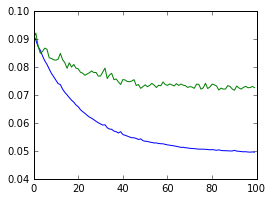

In [149]:
plt.plot(rieamannian_model.logger.loss_hist['train']['logistic'][1:])
plt.plot(rieamannian_model.logger.loss_hist['valid']['logistic'][1:])

In [153]:

# To use the same order of looping through objects for all runs.
model = TTRegression('all-subsets', 'logistic', 4, 0.001, 'sgd', max_iter=100, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.0001)
model.fit_log_val(X_train, y_train, X_val, y_val)
model.logger.loss_hist['train']['logistic'][-1], model.logger.loss_hist['valid']['logistic'][-1]

(0.055013951202464745, 0.068450260366060611)

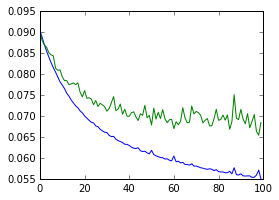

In [154]:
plt.plot(model.logger.loss_hist['train']['logistic'][1:])
plt.plot(model.logger.loss_hist['valid']['logistic'][1:])

In [146]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 20, 'riemannian-sgd', max_iter=100, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.001)#, exp_reg=1.2)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1], rieamannian_model.logger.loss_hist['valid']['logistic'][-1]

(0.048325617261269105, 0.07357982661999532)

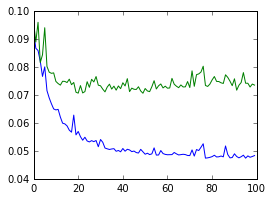

In [147]:
plt.plot(rieamannian_model.logger.loss_hist['train']['logistic'][1:])
plt.plot(rieamannian_model.logger.loss_hist['valid']['logistic'][1:])

In [143]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 5, 'riemannian-sgd', max_iter=100, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.001)#, exp_reg=1.2)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1], rieamannian_model.logger.loss_hist['valid']['logistic'][-1]

(0.052488880609546637, 0.074131447108265663)

In [140]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 20, 'riemannian-sgd', max_iter=100, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.001)#, exp_reg=1.2)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1], rieamannian_model.logger.loss_hist['valid']['logistic'][-1]

(0.04899284828491178, 0.075667014143683223)

In [137]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 10, 'riemannian-sgd', max_iter=100, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.001)#, exp_reg=1.2)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1], rieamannian_model.logger.loss_hist['valid']['logistic'][-1]

0.049805296322674525

0.073058285036361914

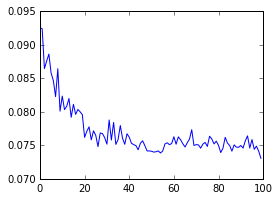

In [138]:
plt.plot(rieamannian_model.logger.loss_hist['valid']['logistic'][1:])

In [109]:
logs['riemannian_sgd_rand'][-1].predict_proba(X_val)

array([[ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,

In [ ]:
# Choose the step size for sgd


In [42]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 32000.0, 'riemannian-sgd', max_iter=10, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

17.867469528251185

In [ ]:
plt.loglog(rieamannian_model.logger.loss_hist['train']['logistic'])

In [41]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 16000.0, 'riemannian-sgd', max_iter=10, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

5.2376773398940273

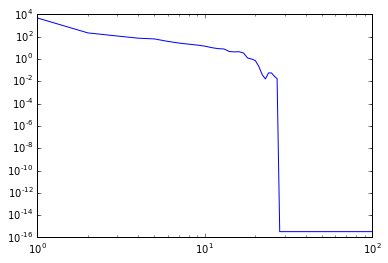

In [39]:
plt.loglog(rieamannian_model.logger.loss_hist['train']['logistic'])

In [43]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 8000.0, 'riemannian-sgd', max_iter=10, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

4.2812900713979012

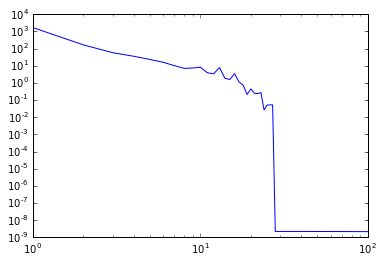

In [37]:
plt.loglog(rieamannian_model.logger.loss_hist['train']['logistic'])

In [44]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 4000.0, 'riemannian-sgd', max_iter=10, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

3.2772404275048075

In [30]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 2000.0, 'riemannian-sgd', max_iter=200, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

3.8138777144144325e-07

In [45]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 1200.0, 'riemannian-sgd', max_iter=10, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

1.2588001429859041

In [46]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 600.0, 'riemannian-sgd', max_iter=10, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.64938201034652476

In [47]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 500.0, 'riemannian-sgd', max_iter=10, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.56848235213715392

In [48]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 400.0, 'riemannian-sgd', max_iter=10, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.44834578313021378

In [49]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 300.0, 'riemannian-sgd', max_iter=10, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.12317075220657484

In [50]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 250.0, 'riemannian-sgd', max_iter=10, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.11523507694629134

In [51]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 200.0, 'riemannian-sgd', max_iter=10, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.078775459626710592

In [56]:

# To use the same order of looping through objects for all runs.
rieamannian_model_800 = TTRegression('all-subsets', 'logistic', 4, 800.0, 'riemannian-sgd', max_iter=200, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model_800.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model_800.logger.loss_hist['train']['logistic'][-1]

3.1281075685984382e-06

In [54]:

# To use the same order of looping through objects for all runs.
rieamannian_model_1600 = TTRegression('all-subsets', 'logistic', 4, 1600.0, 'riemannian-sgd', max_iter=200, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model_1600.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model_1600.logger.loss_hist['train']['logistic'][-1]

4.6763795526036593e-07

In [52]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 160.0, 'riemannian-sgd', max_iter=200, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.00026016104170833684

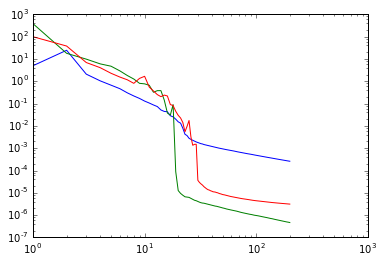

In [57]:
plt.loglog(rieamannian_model.logger.loss_hist['train']['logistic'])
plt.loglog(rieamannian_model_1600.logger.loss_hist['train']['logistic'])
plt.loglog(rieamannian_model_800.logger.loss_hist['train']['logistic'])


In [21]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 140.0, 'riemannian-sgd', max_iter=200, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.00033300869655848692

In [20]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 120.0, 'riemannian-sgd', max_iter=200, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.0004941606919187378

In [19]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 100.0, 'riemannian-sgd', max_iter=200, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.00069424199467138167

In [18]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 80.0, 'riemannian-sgd', max_iter=200, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.0011217952114711302

In [17]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 60.0, 'riemannian-sgd', max_iter=200, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.001236212271499575

In [16]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 40.0, 'riemannian-sgd', max_iter=200, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.0025096523867232153

In [15]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 20.0, 'riemannian-sgd', max_iter=200, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.0043267280526794877

In [12]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 10.0, 'riemannian-sgd', max_iter=200, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.009119125359184365

In [13]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 5.0, 'riemannian-sgd', max_iter=200, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.016789322716112491

In [14]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 2.0, 'riemannian-sgd', max_iter=200, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.034886521963542333

In [7]:

# To use the same order of looping through objects for all runs.
model = TTRegression('all-subsets', 'logistic', 4, 0.08, 'sgd', max_iter=1000, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
model.fit_log_val(X_train, y_train, X_val, y_val)
model.logger.loss_hist['train']['logistic'][-1]

nan

In [8]:

# To use the same order of looping through objects for all runs.
model = TTRegression('all-subsets', 'logistic', 4, 0.04, 'sgd', max_iter=1000, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
model.fit_log_val(X_train, y_train, X_val, y_val)
model.logger.loss_hist['train']['logistic'][-1]

0.10923394645550188

In [9]:

# To use the same order of looping through objects for all runs.
model = TTRegression('all-subsets', 'logistic', 4, 0.02, 'sgd', max_iter=1000, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
model.fit_log_val(X_train, y_train, X_val, y_val)
model.logger.loss_hist['train']['logistic'][-1]

0.039985891406132693

In [10]:

# To use the same order of looping through objects for all runs.
model = TTRegression('all-subsets', 'logistic', 4, 0.01, 'sgd', max_iter=1000, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
model.fit_log_val(X_train, y_train, X_val, y_val)
model.logger.loss_hist['train']['logistic'][-1]

0.070527546289762322

In [11]:

# To use the same order of looping through objects for all runs.
model = TTRegression('all-subsets', 'logistic', 4, 0.005, 'sgd', max_iter=1000, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
model.fit_log_val(X_train, y_train, X_val, y_val)
model.logger.loss_hist['train']['logistic'][-1]

0.048679468688613017

In [60]:
plain_sgd = {}
riemannian_sgd = {}

for batch_size in [-1, 100, 500]:
    # To use the same order of looping through objects for all runs.
    np.random.seed(0)
    model = TTRegression('all-subsets', 'logistic', 4, 0.01, 'sgd', max_iter=10000, verbose=1,
                         fit_intercept=False, batch_size=batch_size, reg=0.)
    model.fit_log_val(X_train, y_train, X_val, y_val)
    plain_sgd[batch_size] = model

    np.random.seed(0)
    # To use the same order of looping through objects for all runs.
    rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 400, 'riemannian-sgd', max_iter=800, verbose=1,
                                     batch_size=batch_size, fit_intercept=False, reg=0.)
    rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
    riemannian_sgd[batch_size] = rieamannian_model

In [61]:
with open('data/riemannian_vs_baseline_hiv_400_001.pickle', 'wb') as f:
    obj = {'plain_sgd': plain_sgd, 'riemannian_sgd': riemannian_sgd,
#            'plain_sgd_rand': plain_sgd_rand, 'riemannian_sgd_rand': riemannian_sgd_rand,
#            'plain_sgd_smart_rand': plain_sgd_smart_rand, 'riemannian_sgd_smart_rand': riemannian_sgd_smart_rand,
           'X_train': X_train, 'y_train': y_train, 'X_val': X_val, 'y_val': y_val}
    pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)

In [62]:
# plain_sgd = {}
riemannian_sgd = {}

for batch_size in [-1, 100, 500]:
    # To use the same order of looping through objects for all runs.
#     np.random.seed(0)
#     model = TTRegression('all-subsets', 'logistic', 4, 0.01, 'sgd', max_iter=10000, verbose=1,
#                          fit_intercept=False, batch_size=batch_size, reg=0.)
#     model.fit_log_val(X_train, y_train, X_val, y_val)
#     plain_sgd[batch_size] = model

    np.random.seed(0)
    # To use the same order of looping through objects for all runs.
    rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 800, 'riemannian-sgd', max_iter=800, verbose=1,
                                     batch_size=batch_size, fit_intercept=False, reg=0.)
    rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
    riemannian_sgd[batch_size] = rieamannian_model

In [63]:
with open('data/riemannian_vs_baseline_hiv_800_001.pickle', 'wb') as f:
    obj = {'plain_sgd': plain_sgd, 'riemannian_sgd': riemannian_sgd,
#            'plain_sgd_rand': plain_sgd_rand, 'riemannian_sgd_rand': riemannian_sgd_rand,
#            'plain_sgd_smart_rand': plain_sgd_smart_rand, 'riemannian_sgd_smart_rand': riemannian_sgd_smart_rand,
           'X_train': X_train, 'y_train': y_train, 'X_val': X_val, 'y_val': y_val}
    pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)

In [64]:
# plain_sgd = {}
riemannian_sgd = {}

for batch_size in [-1, 100, 500]:
    # To use the same order of looping through objects for all runs.
#     np.random.seed(0)
#     model = TTRegression('all-subsets', 'logistic', 4, 0.01, 'sgd', max_iter=10000, verbose=1,
#                          fit_intercept=False, batch_size=batch_size, reg=0.)
#     model.fit_log_val(X_train, y_train, X_val, y_val)
#     plain_sgd[batch_size] = model

    np.random.seed(0)
    # To use the same order of looping through objects for all runs.
    rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 200, 'riemannian-sgd', max_iter=800, verbose=1,
                                     batch_size=batch_size, fit_intercept=False, reg=0.)
    rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
    riemannian_sgd[batch_size] = rieamannian_model

In [65]:
with open('data/riemannian_vs_baseline_hiv_200_001.pickle', 'wb') as f:
    obj = {'plain_sgd': plain_sgd, 'riemannian_sgd': riemannian_sgd,
#            'plain_sgd_rand': plain_sgd_rand, 'riemannian_sgd_rand': riemannian_sgd_rand,
#            'plain_sgd_smart_rand': plain_sgd_smart_rand, 'riemannian_sgd_smart_rand': riemannian_sgd_smart_rand,
           'X_train': X_train, 'y_train': y_train, 'X_val': X_val, 'y_val': y_val}
    pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)

## Train from random init

In [84]:
np.random.seed(0)
w_init = tt.rand(2 * np.ones(X.shape[1]), r=4)
# Divide by norm to make sure the norm is reasonable,
# round to make all the ranks are valid.
w_init = ((1 / w_init.norm()) * w_init).round(eps=0)

plain_sgd_rand = {}
riemannian_sgd_rand = {}

batch_size = -1
# # To use the same order of looping through objects for all runs.
# np.random.seed(0)
# model_rand = TTRegression('all-subsets', 'logistic', 4, 'sgd', max_iter=5000, verbose=1,
#                      fit_intercept=False, batch_size=batch_size, reg=0., coef0=w_init)
# model_rand.fit_log_val(X_train, y_train, X_val, y_val)
# plain_sgd_rand[batch_size] = model_rand

# To use the same order of looping through objects for all runs.
np.random.seed(0)
riemannian_model_rand = TTRegression('all-subsets', 'logistic', 4, 800, 'riemannian-sgd', max_iter=1600, verbose=1,
                                     batch_size=batch_size, fit_intercept=False, reg=0., coef0=w_init)
riemannian_model_rand.fit_log_val(X_train, y_train, X_val, y_val)
riemannian_sgd_rand[batch_size] = riemannian_model_rand

## Random init with beter distribution

In [85]:
from src.models.all_subsets import tensorize_linear_init
w_init = tensorize_linear_init(np.random.rand(X.shape[1]), np.random.rand())
for _ in range(2):
    w_init = w_init + 0 * tt.ones(2, X.shape[1])
w_init = w_init.round(eps=0)

plain_sgd_smart_rand = {}
riemannian_sgd_smart_rand = {}

batch_size = -1
# # To use the same order of looping through objects for all runs.
# np.random.seed(0)
# model_rand = TTRegression('all-subsets', 'logistic', 4, 'sgd', max_iter=5000, verbose=1,
#                      fit_intercept=False, batch_size=batch_size, reg=0., coef0=w_init)
# model_rand.fit_log_val(X_train, y_train, X_val, y_val)
# plain_sgd_smart_rand[batch_size] = model_rand

# To use the same order of looping through objects for all runs.
np.random.seed(0)
riemannian_model_rand = TTRegression('all-subsets', 'logistic', 4, 800, 'riemannian-sgd', max_iter=1600, verbose=1,
                                     batch_size=batch_size, fit_intercept=False, reg=0., coef0=w_init)
riemannian_model_rand.fit_log_val(X_train, y_train, X_val, y_val)
riemannian_sgd_smart_rand[batch_size] = riemannian_model_rand

# Save

In [86]:
with open('data/riemannian_vs_baseline_hiv_800_001.pickle', 'rb') as f:
    logs = pickle.load(f)
plain_sgd = logs['plain_sgd']
riemannian_sgd = logs['riemannian_sgd']

with open('data/riemannian_vs_baseline_hiv_800_001_tmp.pickle', 'wb') as f:
    obj = {'plain_sgd': plain_sgd, 'riemannian_sgd': riemannian_sgd,
           'plain_sgd_rand': plain_sgd_rand, 'riemannian_sgd_rand': riemannian_sgd_rand,
           'plain_sgd_smart_rand': plain_sgd_smart_rand, 'riemannian_sgd_smart_rand': riemannian_sgd_smart_rand,
           'X_train': X_train, 'y_train': y_train, 'X_val': X_val, 'y_val': y_val}
    pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)

# Plot train

In [66]:
params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [4, 3]
   }
mpl.rcParams.update(params)


colors = [(31, 119, 180), (44, 160, 44), (255, 127, 14), (255, 187, 120)]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(colors)):
    r, g, b = colors[i]
    colors[i] = (r / 255., g / 255., b / 255.)

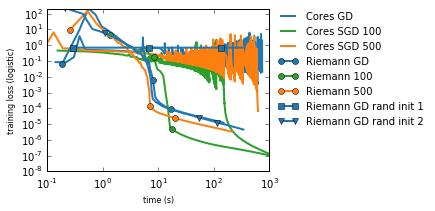

In [159]:
with open('data/riemannian_vs_baseline_hiv_800_001_tmp.pickle', 'rb') as f:
    logs = pickle.load(f)

fig = plt.figure()
plt.loglog(logs['plain_sgd'][-1].logger.time_hist,
           logs['plain_sgd'][-1].logger.loss_hist['train']['logistic'], label='Cores GD',
           linewidth=2, color=colors[0])
plt.loglog(logs['plain_sgd'][100].logger.time_hist, logs['plain_sgd'][100].logger.loss_hist['train']['logistic'],
           label='Cores SGD 100', linewidth=2, color=colors[1])
plt.loglog(logs['plain_sgd'][500].logger.time_hist, logs['plain_sgd'][500].logger.loss_hist['train']['logistic'],
           label='Cores SGD 500', linewidth=2, color=colors[2])

grid = np.array([0.01, 80, 170]) / 10
x = logs['riemannian_sgd'][-1].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd'][-1].logger.time_hist,
           logs['riemannian_sgd'][-1].logger.loss_hist['train']['logistic'],
           marker='o', markevery=marker_indices, label='Riemann GD', linewidth=2, color=colors[0])
grid = np.array([0.05, 80, 170]) / 10
x = logs['riemannian_sgd'][100].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd'][100].logger.time_hist,
           logs['riemannian_sgd'][100].logger.loss_hist['train']['logistic'],
           marker='o', markevery=marker_indices, label='Riemann 100', linewidth=2, color=colors[1])
grid = np.array([0.1, 70, 200]) / 10
x = logs['riemannian_sgd'][500].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd'][500].logger.time_hist,
           logs['riemannian_sgd'][500].logger.loss_hist['train']['logistic'],
           marker='o', markevery=marker_indices, label='Riemann 500', linewidth=2, color=colors[2])

grid = np.array([0.1, 20, 400]) / 3
x = logs['riemannian_sgd_rand'][-1].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd_rand'][-1].logger.time_hist,
           logs['riemannian_sgd_rand'][-1].logger.loss_hist['train']['logistic'],
           marker='s', markevery=marker_indices, label='Riemann GD rand init 1', linewidth=2, color=colors[0])

grid = np.array([0.8, 3, 150, 320]) / 3
x = logs['riemannian_sgd_rand'][-1].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd_smart_rand'][-1].logger.time_hist,
           logs['riemannian_sgd_smart_rand'][-1].logger.loss_hist['train']['logistic'],
           marker='v', markevery=marker_indices, label='Riemann GD rand init 2', linewidth=2, color=colors[0])

# plt.loglog(plain_sgd_rand[-1].logger.time_hist,
#            plain_sgd_rand[-1].logger.loss_hist['train']['logistic'],
#            marker='v', markevery=marker_indices, label='Cores GD rand init', linewidth=2, color=colors[0])

legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1.04), frameon=False)
plt.xlabel('time (s)')
plt.ylabel('training loss (logistic)')
plt.minorticks_off()
ax = plt.gca()
ax.set_ylim([1e-8, 200])
ax.set_xlim([0.1, 1000])
fig.tight_layout()

In [160]:
fig.savefig('data/riemannian_vs_plain_hiv_train.pdf', bbox_extra_artists=(legend,), bbox_inches='tight')

# Plot validation

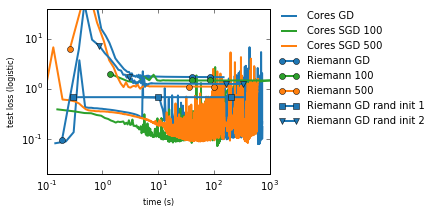

In [161]:
with open('data/riemannian_vs_baseline_hiv_800_001_tmp.pickle', 'rb') as f:
    logs = pickle.load(f)

fig = plt.figure()
plt.loglog(logs['plain_sgd'][-1].logger.time_hist,
           logs['plain_sgd'][-1].logger.loss_hist['valid']['logistic'], label='Cores GD',
           linewidth=2, color=colors[0])
plt.loglog(logs['plain_sgd'][100].logger.time_hist, logs['plain_sgd'][100].logger.loss_hist['valid']['logistic'],
           label='Cores SGD 100', linewidth=2, color=colors[1])
plt.loglog(logs['plain_sgd'][500].logger.time_hist, logs['plain_sgd'][500].logger.loss_hist['valid']['logistic'],
           label='Cores SGD 500', linewidth=2, color=colors[2])

grid = np.array([0.01, 80, 170]) / 2
x = logs['riemannian_sgd'][-1].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd'][-1].logger.time_hist,
           logs['riemannian_sgd'][-1].logger.loss_hist['valid']['logistic'],
           marker='o', markevery=marker_indices, label='Riemann GD', linewidth=2, color=colors[0])
grid = np.array([0.05, 80, 170]) / 2
x = logs['riemannian_sgd'][100].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd'][100].logger.time_hist,
           logs['riemannian_sgd'][100].logger.loss_hist['valid']['logistic'],
           marker='o', markevery=marker_indices, label='Riemann 100', linewidth=2, color=colors[1])
grid = np.array([0.1, 70, 200]) / 2
x = logs['riemannian_sgd'][500].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd'][500].logger.time_hist,
           logs['riemannian_sgd'][500].logger.loss_hist['valid']['logistic'],
           marker='o', markevery=marker_indices, label='Riemann 500', linewidth=2, color=colors[2])

grid = np.array([0.1, 20, 400]) / 2
x = logs['riemannian_sgd_rand'][-1].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd_rand'][-1].logger.time_hist,
           logs['riemannian_sgd_rand'][-1].logger.loss_hist['valid']['logistic'],
           marker='s', markevery=marker_indices, label='Riemann GD rand init 1', linewidth=2, color=colors[0])

grid = np.array([0.8, 3, 150, 320])
x = logs['riemannian_sgd_rand'][-1].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd_smart_rand'][-1].logger.time_hist,
           logs['riemannian_sgd_smart_rand'][-1].logger.loss_hist['valid']['logistic'],
           marker='v', markevery=marker_indices, label='Riemann GD rand init 2', linewidth=2, color=colors[0])

# plt.loglog(plain_sgd_rand[-1].logger.time_hist,
#            plain_sgd_rand[-1].logger.loss_hist['valid']['logistic'],
#            marker='v', markevery=marker_indices, label='Cores GD rand init', linewidth=2, color=colors[0])

legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1.04), frameon=False)
plt.xlabel('time (s)')
plt.ylabel('test loss (logistic)')
plt.minorticks_off()
ax = plt.gca()
ax.set_ylim([0.02, 40])
ax.set_xlim([0.1, 1000])
fig.tight_layout()

In [162]:
fig.savefig('data/riemannian_vs_plain_hiv_validation.pdf', bbox_extra_artists=(legend,), bbox_inches='tight')